In [1]:
#Preliminary Installs
#this section includes a pip installation command for the 'XGBoost' library, the library for the gradient boosting algorithm and model that will be used
!pip install xgboost


In [2]:
#ST10072411 Brice Agnew
#28-05-2025
#PDANA8411 POE Part 2
#-Cancer Detection Classification Model
#>In deciding on which type of dataset I would use, I decided to go for a mixed dataset that had a prediction value that determined
# whether or not someone actually had cancer or not, making this a cancer screening software.
#>I made this decision as I thought that the *risk* of 'Overdiagnosing' (I.e. Diagnosing someone with a 'Benign' tumor when 
# - they dont have cancer) might be too great with datasets that focus on severity level 

#Imports
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix



#EDA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

#Feature Selection
from sklearn.feature_selection import chi2


In [3]:
#declaring and retrieving the dataset (unprocessed)
cancerInitial = pd.read_csv('cancer patient data sets.csv', index_col='index')


In [4]:
#Checking for missing values

print("Missing Values per column:")
missing_counts = cancerInitial.isnull().sum() #This line takes methods from the Pandas package to determine what the number of missing values is from each column
print(missing_counts)#this line prints out the results for each label/column

total_missing = cancerInitial.isnull().sum().sum() #This line determines the total number of missing values in the data set 
print("\n", f"Total number of missing values in set: {total_missing}")# this line prints the result data in a specified format



Missing Values per column:
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

 Total number of missing values in set: 0


In [5]:
#Checking for duplicated values
dup_count = cancerInitial.duplicated().sum()
print(f"Total number of Duplicated rows: {dup_count}") 

dup_columns = cancerInitial.T.duplicated().sum()  
print("\n")
print(f"Total number of Duplicate columns: {dup_columns}", "\n") 



Total number of Duplicated rows: 0


Total number of Duplicate columns: 0 



In [6]:
#Cleaning the feature names for consistency 
cancerInitial.rename(columns=str.lower, inplace=True)
cancerInitial.rename(columns={col: col.replace(" ", "_") for col in cancerInitial.columns}, inplace=True)



,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,obesity,...,coughing_of_blood,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [7]:
#Dropping the likely unneccessary ID column off the bat.
cancerInitial.drop("patient_id", axis=1, inplace=True)


In [43]:
#EDA

#Converting the Cleaned dataset to a more reasonable name
cData = cancerInitial

cData.describe()

,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,obesity,...,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring,level
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000,1.062000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686,0.815365
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,1.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000,2.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000,2.000000


In [45]:
cData.head()

,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,obesity,...,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring,level
index,,,,,,,,,,,,,,,,,,,,,
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2


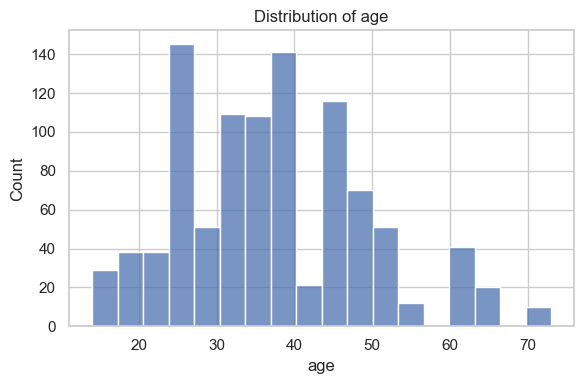

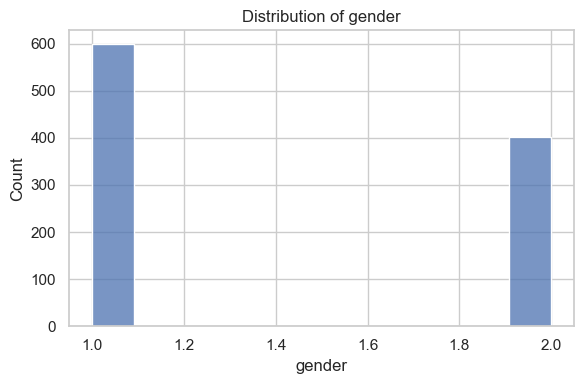

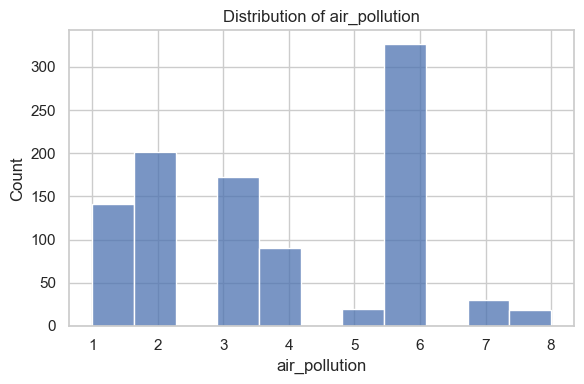

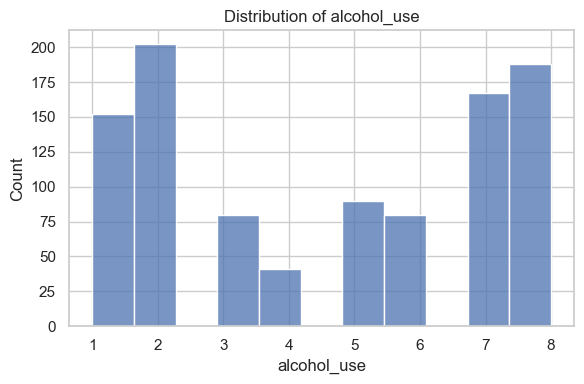

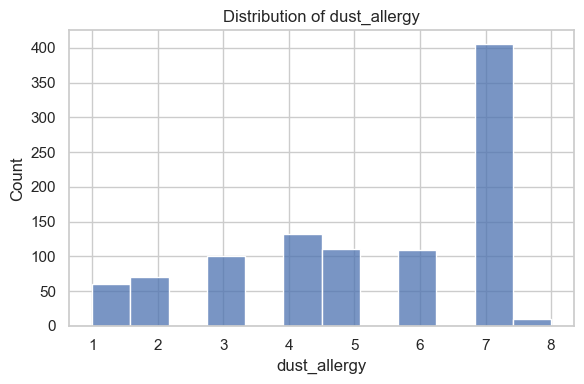

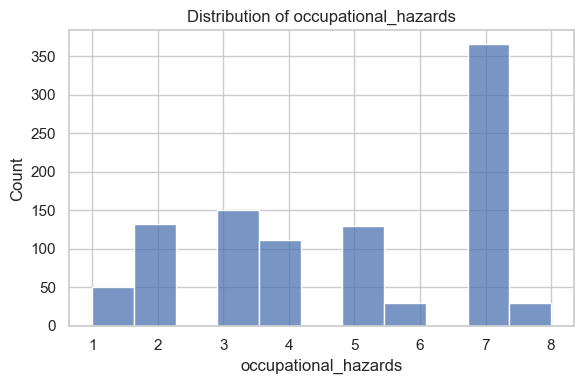

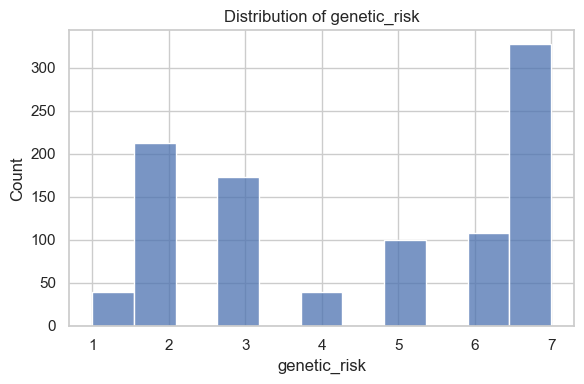

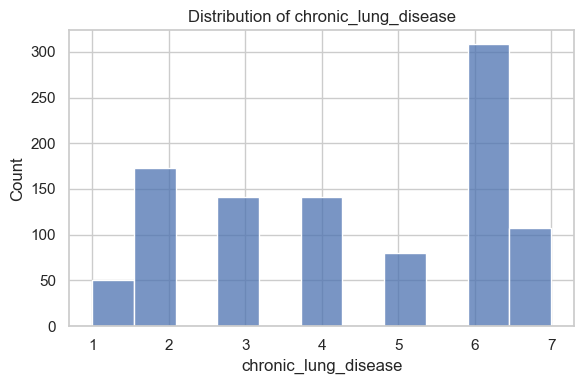

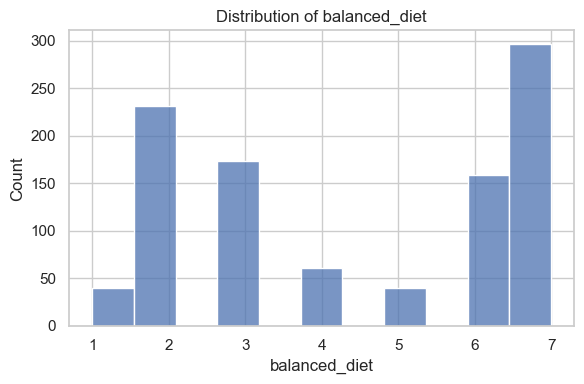

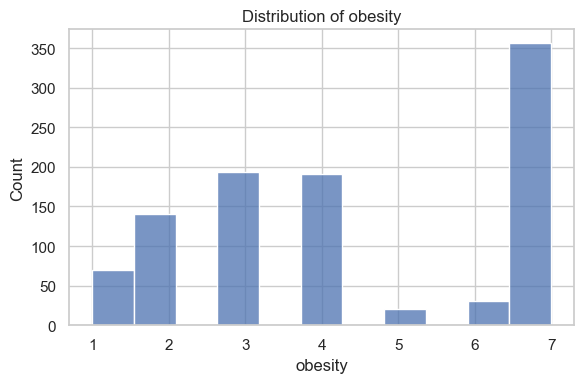

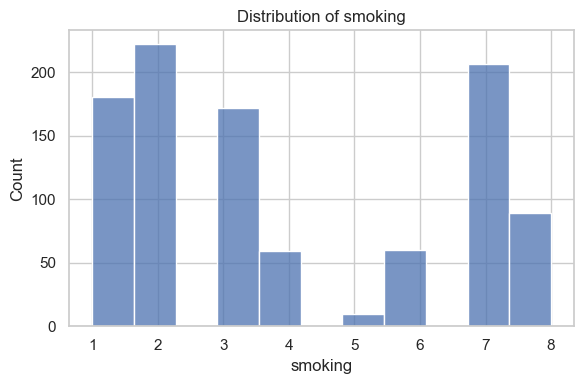

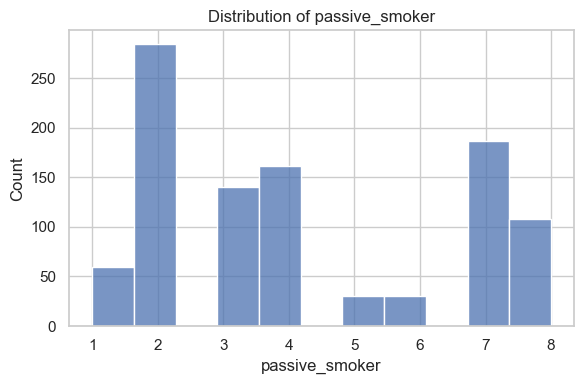

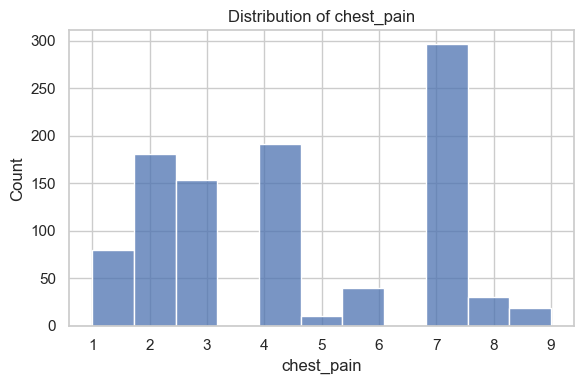

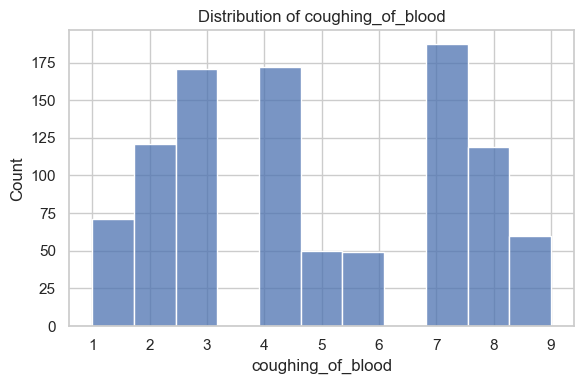

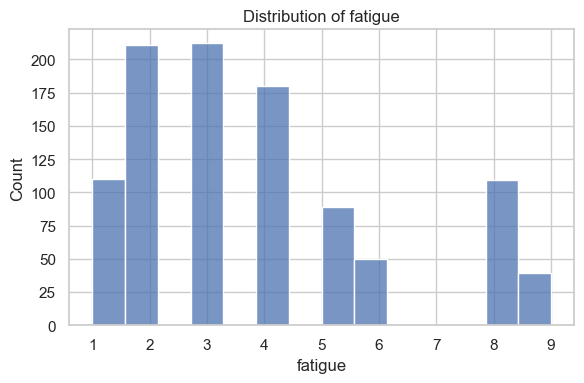

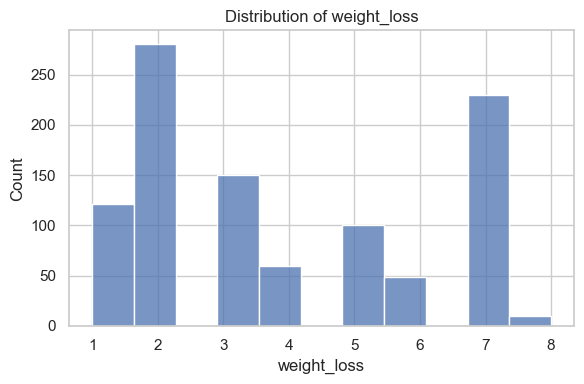

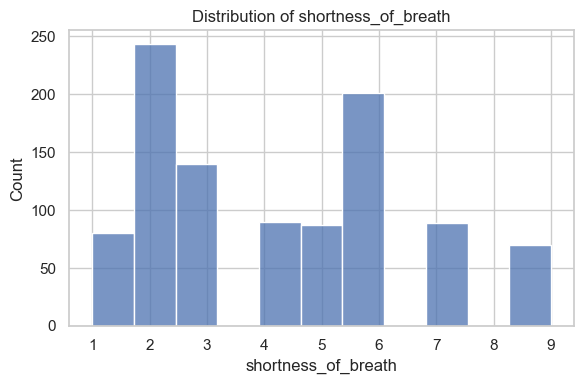

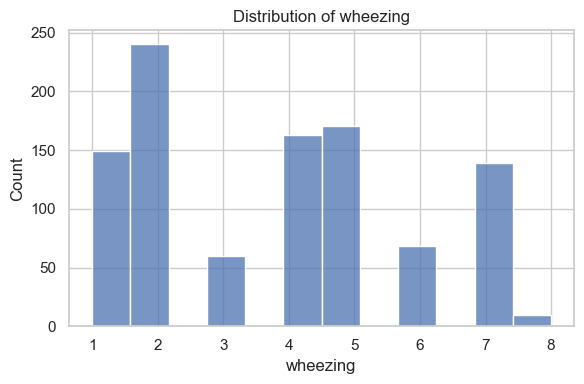

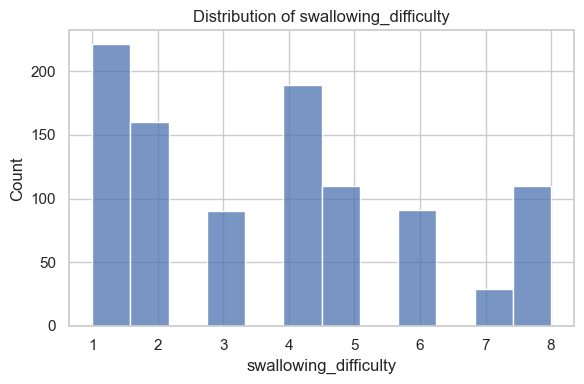

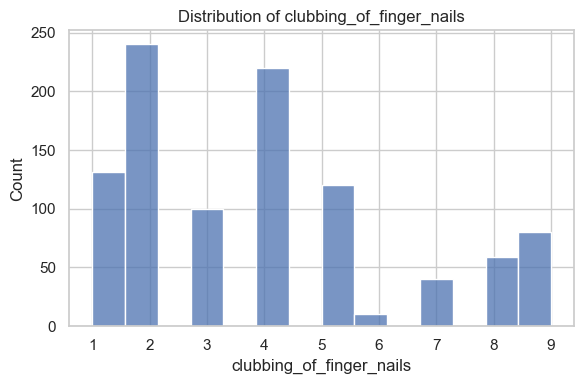

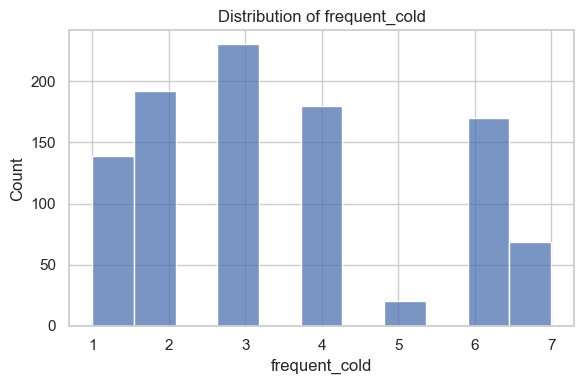

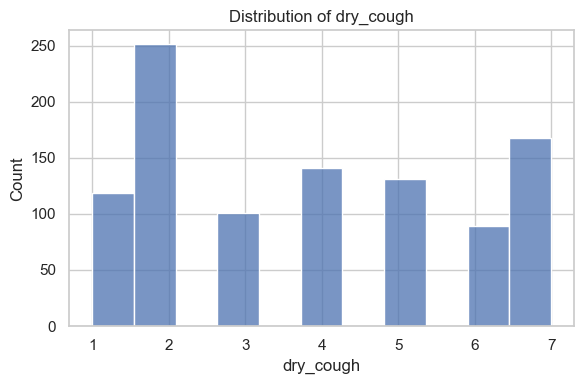

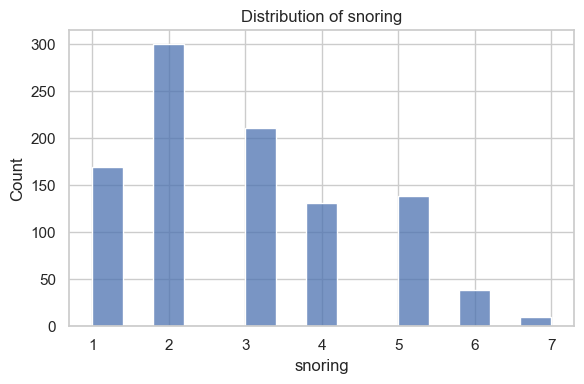

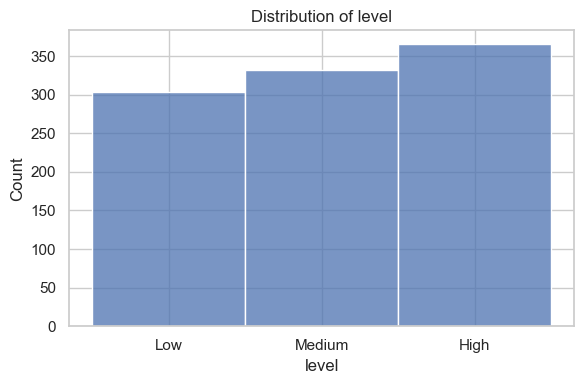

In [10]:

#Univariate analysis
sns.set(style="whitegrid")

# Univariate plots
columns = [
    "age", "gender", "air_pollution", "alcohol_use", "dust_allergy",
    "occupational_hazards", "genetic_risk", "chronic_lung_disease", "balanced_diet",
    "obesity", "smoking", "passive_smoker", "chest_pain", "coughing_of_blood",
    "fatigue", "weight_loss", "shortness_of_breath", "wheezing",
    "swallowing_difficulty", "clubbing_of_finger_nails", "frequent_cold",
    "dry_cough", "snoring", "level"  # Include 'level' only if it's part of your univariate EDA
]

# Plot all histograms in a loop
for col in columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=cData, x=col, kde=False)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


In [11]:
#Feature Selection: Part 1

#Calculating the correlation values to the target value 'level' (Pearson correlation)

cData['level'] = cData['level'].map({'Low': 0, 'Medium': 1, 'High':2})

print("Correlation of features with target:\n")
corr = cData.corr()
print(corr['level'].sort_values(ascending=False))




Correlation of features with target:

level                       1.000000
obesity                     0.827435
coughing_of_blood           0.782092
alcohol_use                 0.718710
dust_allergy                0.713839
balanced_diet               0.706273
passive_smoker              0.703594
genetic_risk                0.701303
occupational_hazards        0.673255
chest_pain                  0.645461
air_pollution               0.636038
fatigue                     0.625114
chronic_lung_disease        0.609971
smoking                     0.519530
shortness_of_breath         0.497024
frequent_cold               0.444017
dry_cough                   0.373968
weight_loss                 0.352738
snoring                     0.289366
clubbing_of_finger_nails    0.280063
swallowing_difficulty       0.249142
wheezing                    0.242794
age                         0.060048
gender                     -0.164985
Name: level, dtype: float64


In [12]:
#Feature Selection: Part 2
#Calculating relevance using Chi^2 and calculating P-value

# Encode target variable
le = LabelEncoder()

y_encoded = le.fit_transform(cData['level'])

# Drop target column and use the rest as features
X = cData.drop(columns=['level'])

# Splitting the dataset before feature selection to try prevent data leakage
x_train, x_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=69
)

# chi2 requires non-negative values
if (X < 0).any().any():
    raise ValueError("Chi2 input must be non-negative. Found negative values.")

# Runs the chi2 test
chi_scores, p_values = chi2(x_train,y_train)

# Creates two dataframes to show each metric in descending/ascending order
chi_df = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': chi_scores
}).sort_values(by='Chi2 Score', ascending=False)

#The P-Value metric represents how likely it is that a feature is related to a target 
#(the lower the value the more likely the relation) 
pvalue_df = pd.DataFrame({
    'Feature': X.columns,
    'p-value': p_values
}).sort_values(by='p-value', ascending=True)

print("Chi2 Scores (Descending):")
print(chi_df)

print("\nP-values (Ascending):")
print(pvalue_df)


Chi2 Scores (Descending):
                     Feature  Chi2 Score
13         coughing_of_blood  658.892468
3                alcohol_use  620.887419
11            passive_smoker  609.497423
9                    obesity  578.975295
10                   smoking  517.156211
8              balanced_diet  478.645731
2              air_pollution  431.961151
12                chest_pain  399.411274
6               genetic_risk  394.776190
14                   fatigue  384.855493
5       occupational_hazards  330.540624
4               dust_allergy  328.886364
16       shortness_of_breath  275.210820
7       chronic_lung_disease  238.198406
19  clubbing_of_finger_nails  204.538310
15               weight_loss  173.532367
20             frequent_cold  170.516956
17                  wheezing  152.042346
21                 dry_cough  118.636398
18     swallowing_difficulty   96.950451
22                   snoring   55.090080
0                        age   31.358688
1                     gender   

In [13]:
#Feature Selection: Part 3
#removing the features with the lowest chi^2 score (relevance) to reduce noise

chi_threshold = 100
top_features = chi_df[chi_df['Chi2 Score'] > chi_threshold]['Feature']

x_train = x_train[top_features]
x_test = x_test[top_features]



In [15]:
#Training: Part 1
#Training Random Forest ensemble model, Implementing the inbuilt feature selection
#-functionality of random forest with 'feature_importances_' as a means of comparing to to the chi^2-test scores


modelFSTest = RandomForestClassifier()
modelFSTest.fit(x_train, y_train) #Notably, this instance of the model is trained on the entire split set. no training testing split.
#This is because this instance is only for showcassing the performance of the in built feature selection functionality
#- in comparison to the other methods used so far

importances = modelFSTest.feature_importances_
feature_names = x_train.columns

# Display top features
print("Most relevant features in the dataset")
feature_scores = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print(feature_scores.head(30))


Most relevant features in the dataset
obesity                     0.119394
wheezing                    0.116903
coughing_of_blood           0.116120
passive_smoker              0.101522
fatigue                     0.073753
alcohol_use                 0.059281
balanced_diet               0.053667
dust_allergy                0.045354
clubbing_of_finger_nails    0.040245
shortness_of_breath         0.036096
occupational_hazards        0.035751
frequent_cold               0.032569
chest_pain                  0.031477
weight_loss                 0.030251
air_pollution               0.028345
smoking                     0.027193
genetic_risk                0.027075
chronic_lung_disease        0.014549
dry_cough                   0.010456
dtype: float64


In [16]:
#Training: Part 2
#Setting up the piplines to train the models



# ===== Pipeline for Random Forest =====
pipelineRF = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=5)),  # adjust components if needed
    ('classifier', RandomForestClassifier(random_state=69))
])

# ===== Pipeline for XGBoost =====
pipelineXGB = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=5)),
    ('classifier', XGBClassifier( eval_metric='mlogloss', random_state=69))
])



In [17]:
#Training: Part 3

pipelineRF.fit(x_train, y_train)

pipelineXGB.fit(x_train, y_train)



Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=5)),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='mlogloss',
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [18]:
#Evaluation: Part 1

# Making predictions
y_predRF = pipelineRF.predict(x_test)

y_predXGB = pipelineXGB.predict(x_test)

# Evaluate accuracy
accuracyRF = accuracy_score(y_test, y_predRF)
print(f"Accuracy for the 'Random Forest' model: {accuracyRF:.2f}")

accuracyXGB = accuracy_score(y_test, y_predXGB)
print(f"Accuracy for the 'XGBoost' model: {accuracyXGB:.2f}")


Accuracy for the 'Random Forest' model: 1.00
Accuracy for the 'XGBoost' model: 1.00


In [19]:
#Evaluation: Part 2
#Further insights into performance, and comparison between the models.

# Accuracy and Confusion Matrices
print("Accuracy (Random Forest):", accuracy_score(y_test, y_predRF))
print("Confusion Matrix RF:")
print(confusion_matrix(y_test, y_predRF))

print("\nAccuracy (XGBoost):", accuracy_score(y_test, y_predXGB))
print("Confusion Matrix XGB:")
print(confusion_matrix(y_test, y_predXGB))

# Cross Validation Check
rf_scores = cross_val_score(pipelineRF, X, y_encoded, cv=5)
xgb_scores = cross_val_score(pipelineXGB, X, y_encoded, cv=5)

print("\nRF Cross-Validation Accuracy:", rf_scores)
print("XGB Cross-Validation Accuracy:", xgb_scores)

print("")

print("Random Forest Classification Report:")
print(classification_report(y_test, y_predRF))

print("XGBoost Classification Report:")
print(classification_report(y_test, y_predXGB))



Accuracy (Random Forest): 1.0
Confusion Matrix RF:
[[61  0  0]
 [ 0 66  0]
 [ 0  0 73]]

Accuracy (XGBoost): 1.0
Confusion Matrix XGB:
[[61  0  0]
 [ 0 66  0]
 [ 0  0 73]]

RF Cross-Validation Accuracy: [1. 1. 1. 1. 1.]
XGB Cross-Validation Accuracy: [0.99 1.   1.   1.   1.  ]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00        66
           2       1.00      1.00      1.00        73

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00        66
           2       1.00      1.00      1.00        73

    accuracy                           1.00       200


Unique, post encoded level values [Low, Medium, High]:  [0 1 2]


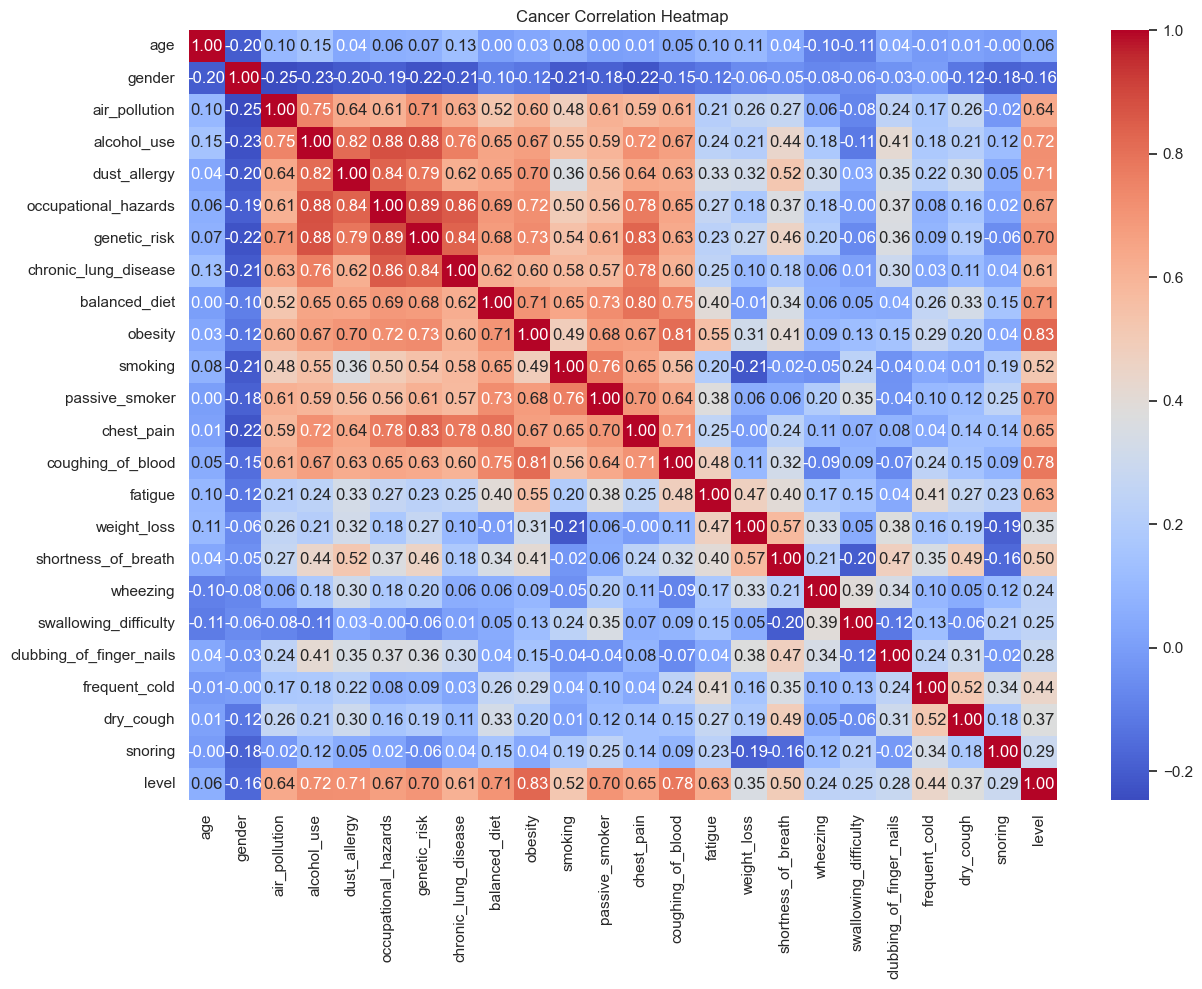

In [20]:
#Correlation Heatmap
heatmapData = cData.copy()

le = LabelEncoder()
heatmapData['level'] = le.fit_transform(heatmapData['level']) 


print("Unique, post encoded level values [Low, Medium, High]: ",heatmapData['level'].unique())  


#Adjusted size to make the numbers more legible
plt.figure(figsize=(14, 10))

sns.heatmap(heatmapData.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Cancer Correlation Heatmap")
plt.show()




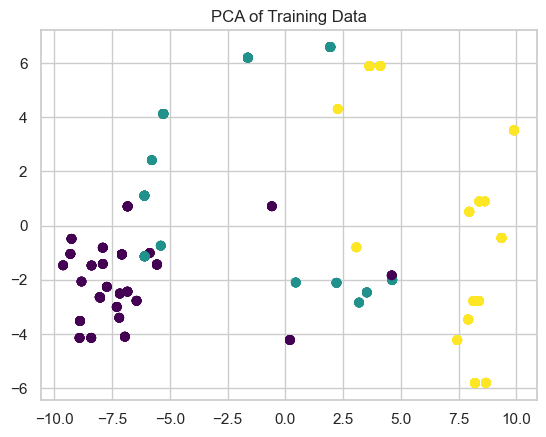

In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_train)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis')
plt.title("PCA of Training Data")
plt.show()